<a href="https://colab.research.google.com/github/RafaelBernardinoDev/linear-regression-housing/blob/main/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introdução

Este projeto tem como objetivo prever os preços de casas com base em suas características estruturais e qualitativas. Os dados utilizados foram inspirados no conjunto *House Prices - Advanced Regression Techniques* do Kaggle.

A metodologia principal empregada para essa previsão será a **Regressão Linear**, um dos métodos mais utilizados para análise preditiva em problemas de regressão.

## Sobre os dados

Os principais atributos utilizados no modelo são:

- **`area_primeiro_andar`**: Representa a área do primeiro andar da propriedade (m²).  
- **`existe_segundo_andar`**: Variável binária indicando se há um segundo andar (1 = Sim, 0 = Não).  
- **`area_segundo_andar`**: Se a propriedade possuir um segundo andar, essa variável indica sua área total (m²).  
- **`quantidade_banheiros`**: Número total de banheiros na propriedade.  
- **`capacidade_carros_garagem`**: Capacidade máxima de veículos na garagem.  
- **`qualidade_da_cozinha_Excelente`**: Indica se a qualidade da cozinha é "Excelente" (1 = Sim, 0 = Não).  
- **`preco_de_venda`**: Preço final da propriedade (variável alvo a ser prevista).

## Libs utilizadas
- **`pandas`**
- **`seaborn`**
- **`plotly`**
- **`numpy`**
- **`matplotlib`**


# Conhecendo os dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/RafaelBernardinoDev/linear-regression-housing/refs/heads/main/Pre%C3%A7os_de_casas.csv')
df.head()

,Id,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,1,79.5224,1,79.3366,2,548,0,1027905.0
1,2,117.2398,0,0.0000,2,460,0,894795.0
2,3,85.4680,1,80.4514,2,608,0,1101855.0
3,4,89.2769,1,70.2324,1,642,0,690200.0
4,5,106.3705,1,97.8237,2,836,0,1232500.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1438 entries, 0 to 1437
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Id                              1438 non-null   int64  
 1   area_primeiro_andar             1438 non-null   float64
 2   existe_segundo_andar            1438 non-null   int64  
 3   area_segundo_andar              1438 non-null   float64
 4   quantidade_banheiros            1438 non-null   int64  
 5   capacidade_carros_garagem       1438 non-null   int64  
 6   qualidade_da_cozinha_Excelente  1438 non-null   int64  
 7   preco_de_venda                  1438 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 90.0 KB


In [3]:
df.shape

(1438, 8)

In [4]:
# Removendo a coluna ID do dataset

df.drop('Id', axis=1, inplace=True)
df.head()

,area_primeiro_andar,existe_segundo_andar,area_segundo_andar,quantidade_banheiros,capacidade_carros_garagem,qualidade_da_cozinha_Excelente,preco_de_venda
0,79.5224,1,79.3366,2,548,0,1027905.0
1,117.2398,0,0.0000,2,460,0,894795.0
2,85.4680,1,80.4514,2,608,0,1101855.0
3,89.2769,1,70.2324,1,642,0,690200.0
4,106.3705,1,97.8237,2,836,0,1232500.0


# Correlação

In [5]:
#Correlação
corr = df.corr()

In [6]:
corr['preco_de_venda']

,preco_de_venda
area_primeiro_andar,0.616557
existe_segundo_andar,0.138541
area_segundo_andar,0.305311
quantidade_banheiros,0.563132
capacidade_carros_garagem,0.640214
qualidade_da_cozinha_Excelente,0.496223
preco_de_venda,1.000000


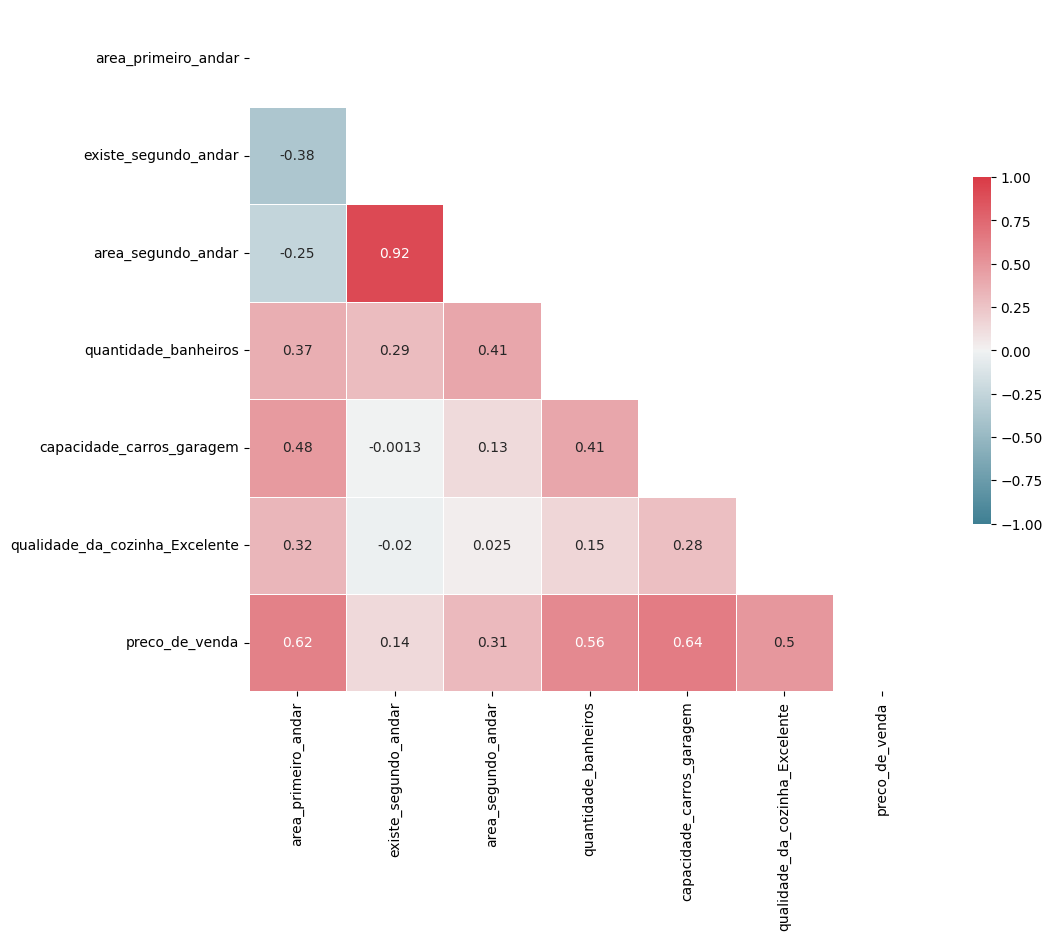

In [7]:
#Gerar mapa de calor para correlação

# Gerar uma máscara para o triângulo superior
mascara = np.zeros_like(corr, dtype=bool)
mascara[np.triu_indices_from(mascara)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mascara, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

# Exibir o mapa de calor (heatmap)
plt.show()

## 💡 Observações:

- A **correlação entre a capacidade de carros na garagem e a área do primeiro andar** é moderadamente positiva (**0.48**). Isso indica que, em geral, casas com garagens maiores tendem a ter um primeiro andar mais espaçoso.  

- Existe uma correlação moderadamente positiva (**0.41**) entre a **capacidade da garagem e a quantidade de banheiros**. Isso sugere que propriedades com maior espaço para estacionamento também costumam ter mais banheiros, possivelmente devido ao seu maior tamanho geral.  

- A **correlação entre a área do primeiro andar e a área do segundo andar** é fraca e negativa (**-0.25**). Isso indica que, em muitas casas, um aumento na área do primeiro andar tende a vir acompanhado de uma redução na área do segundo andar. Essa relação pode refletir uma diferença entre casas térreas, que aproveitam mais espaço no primeiro andar, e sobrados, que distribuem a área entre os pavimentos.  


# Relacionando variáveis

Text(0.5, 1.0, 'Relação entre Preço x Área')

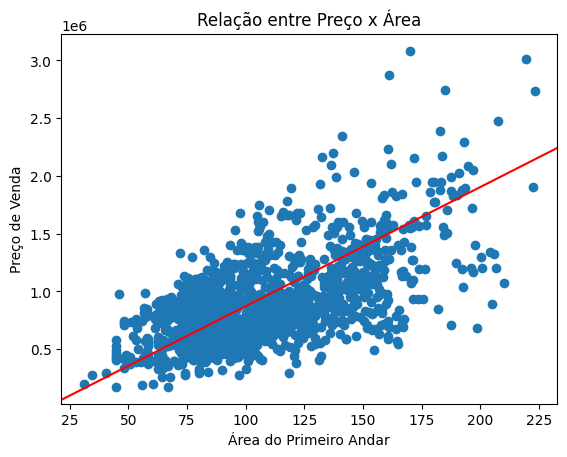

In [8]:
import plotly.express as px
plt.scatter(df['area_primeiro_andar'], df['preco_de_venda'])
plt.axline(xy1=(35,200000), xy2 = (190,1800000), color = 'red')
plt.xlabel('Área do Primeiro Andar')
plt.ylabel('Preço de Venda')
plt.title('Relação entre Preço x Área')

In [9]:
px.scatter(df ,x = 'area_primeiro_andar', y = 'preco_de_venda', trendline_color_override='red', trendline='ols')

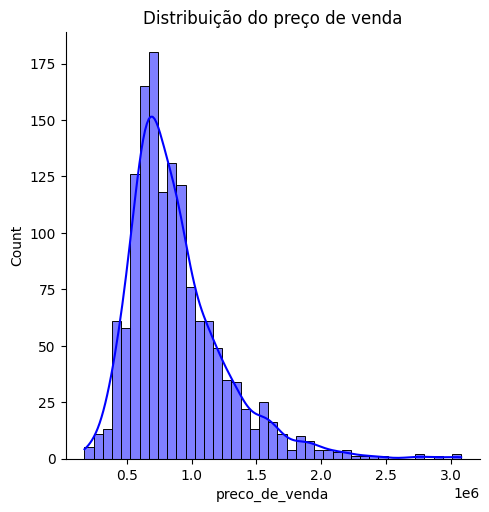

In [10]:
sns.displot(df['preco_de_venda'], kde = True, color = 'blue')
plt.title('Distribuição do preço de venda')
plt.show()

# Separando dataset para treino e teste

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
y = df['preco_de_venda']
x = df.drop(columns = 'preco_de_venda')

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2, random_state = 280)

In [17]:
df_train = pd.DataFrame(data = x_train)
df_train['preco_de_venda'] = y_train

In [18]:
from statsmodels.formula.api import ols

model0 = ols('preco_de_venda ~ area_primeiro_andar', data = df_train).fit()

In [20]:
model0.params

,0
Intercept,134910.870451
area_primeiro_andar,6958.986708


- O valor do intercepto representa o preço esperado de uma casa quando todas as variáveis preditoras são zero. Neste caso, isso significa que, quando a área do primeiro andar é zero, o valor estimado da casa é de R$ 134.910.  

- O modelo indica que, para cada metro quadrado adicional, o preço da casa aumenta, em média, R$ 6.958,00.

In [22]:
print(model0.summary())

                            OLS Regression Results                            
Dep. Variable:         preco_de_venda   R-squared:                       0.388
Model:                            OLS   Adj. R-squared:                  0.387
Method:                 Least Squares   F-statistic:                     726.6
Date:                Mon, 24 Mar 2025   Prob (F-statistic):          2.16e-124
Time:                        19:48:30   Log-Likelihood:                -16085.
No. Observations:                1150   AIC:                         3.217e+04
Df Residuals:                    1148   BIC:                         3.218e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1.349e+05   2